In [1]:
# !pip install miditime

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from miditime.miditime import MIDITime


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:


data = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log.csv')

#weights are based on table 4 in https://www.mdpi.com/2076-3417/12/21/10951
emotions = ["anger","sadness","happiness","fear","neutral"]
random.seed(42)
new_column=random.choices(emotions, weights=(177,30,38,30,312), k=len(data))

#add column
data['Emotion']=new_column

In [4]:
# data.to_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_with_Emotions.csv', index=False)

In [3]:
data

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
0,32320,2017-01-01 00:00:00,1683,320,14,Resolution1,Type10,Plan3,neutral
1,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,anger
2,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
3,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,anger
4,32320,2017-01-01 00:00:00,1283,499,8,Resolution1,Type20,Plan8,neutral
...,...,...,...,...,...,...,...,...,...
1343247,14280,2019-06-30 00:00:00,490,147,33,Resolution1,Type50,Plan6,neutral
1343248,14300,2019-06-30 00:00:00,696,123,15,Resolution1,Type50,Plan1,neutral
1343249,14320,2019-06-30 00:00:00,320,95,15,Resolution1,Type20,Plan6,happiness
1343250,14320,2019-06-30 00:00:00,794,279,11,Resolution2,Type40,Plan3,neutral


In [4]:
user_exp = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/User_experience.csv')
user_exp

,Agent_ID,Call_Date,User_Experience
0,32430,2017-01-25 00:00:00,very good
1,26020,2017-01-26 00:00:00,very good
2,26010,2017-01-27 00:00:00,very good
3,26020,2017-01-27 00:00:00,very good
4,32040,2017-01-27 00:00:00,very good
...,...,...,...
495,32350,2017-12-09 00:00:00,very good
496,32410,2017-12-09 00:00:00,very good
497,32380,2017-12-10 00:00:00,excellent
498,32430,2017-12-10 00:00:00,very good


In [5]:
merged_df = data.merge(user_exp, on=['Agent_ID', 'Call_Date'], how='right')

In [6]:
merged_df

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion,User_Experience
0,32430,2017-01-25 00:00:00,1990,629,18,Resolution1,Type20,Plan3,neutral,very good
1,32430,2017-01-25 00:00:00,2586,530,12,Resolution1,Type40,Plan1,anger,very good
2,32430,2017-01-25 00:00:00,1388,264,7,Resolution1,Type40,Plan6,sadness,very good
3,32430,2017-01-25 00:00:00,1024,272,13,Resolution2,Type10,Plan5,neutral,very good
4,32430,2017-01-25 00:00:00,1496,306,9,Resolution1,Type30,Plan6,anger,very good
...,...,...,...,...,...,...,...,...,...,...
9245,14210,2017-12-11 00:00:00,2816,661,13,Resolution1,Type40,Plan2,fear,very good
9246,14210,2017-12-11 00:00:00,846,329,13,Resolution1,Type50,Plan4,neutral,very good
9247,14210,2017-12-11 00:00:00,451,106,10,Resolution1,Type40,Plan5,anger,very good
9248,14210,2017-12-11 00:00:00,2239,458,14,Resolution1,Type40,Plan4,anger,very good


In [7]:
call_res = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_Resolution_Type.csv')
call_res

,Call_resolution_ID,Call_resolution_Description
0,Resolution1,Call resolved by agent
1,Resolution2,Transferred to other agent
2,Resolution3,Escalated to Supervisor
3,Resolution4,NaN
4,Resolution5,NaN
5,Resolution6,NaN
6,Resolution7,NaN
7,Resolution8,NaN
8,Resolution9,NaN
9,Resolution10,NaN


In [8]:
call_type = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_Type.csv')
call_type

,Call_Type_ID,Call_Type_Description
0,Type10,Billing & Payments
1,Type20,Technical Support
2,Type30,Service Changes
3,Type40,Products & Services
4,Type50,General Inquiries
5,Type60,NaN
6,Type70,NaN
7,Type80,NaN
8,Type90,NaN
9,Type100,NaN


In [9]:
wire_plans = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Wireless_Plans.csv')
wire_plans

,Plan_ID,Monthly_Fee,Data_GB
0,Plan1,25.0,2GB
1,Plan2,35.0,2GB
2,Plan3,40.0,4GB
3,Plan4,45.0,4GB
4,Plan5,50.0,6GB
5,Plan6,55.0,6GB
6,Plan7,65.0,10GB
7,Plan8,75.0,20GB
8,Plan9,NaN,NaN
9,Plan10,NaN,NaN


Select the data with anger emotion

In [10]:
anger_data = data[data['Emotion'] == 'anger']
anger_data

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
1,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,anger
2,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
3,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,anger
7,14270,2017-01-01 00:00:00,2642,1027,12,Resolution3,Type20,Plan4,anger
9,26200,2017-01-01 00:00:00,1154,427,1,Resolution3,Type50,Plan5,anger
...,...,...,...,...,...,...,...,...,...
1343219,14300,2019-06-30 00:00:00,874,340,27,Resolution1,Type50,Plan3,anger
1343224,26310,2019-06-30 00:00:00,1242,459,19,Resolution1,Type20,Plan4,anger
1343225,32260,2019-06-30 00:00:00,159,53,14,Resolution1,Type30,Plan4,anger
1343231,32340,2019-06-30 00:00:00,423,164,10,Resolution2,Type20,Plan3,anger


In [11]:
# anger_data.to_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_anger.csv', index=False)

In [13]:
anger_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404955 entries, 1 to 1343251
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Agent_ID              404955 non-null  int64 
 1   Call_Date             404955 non-null  object
 2   Talk_Time             404955 non-null  int64 
 3   After_Call_Work_Time  404955 non-null  int64 
 4   Queue_Time            404955 non-null  int64 
 5   Call_resolution_ID    404955 non-null  object
 6   Call_Type_ID          404955 non-null  object
 7   Plan_ID               404955 non-null  object
 8   Emotion               404955 non-null  object
dtypes: int64(4), object(5)
memory usage: 30.9+ MB


In [14]:
anger_data.describe()

,Agent_ID,Talk_Time,After_Call_Work_Time,Queue_Time
count,404955.000000,404955.000000,404955.000000,404955.000000
mean,24915.649541,849.511504,246.452789,15.566665
std,7455.870533,586.934123,178.973077,9.398322
min,14000.000000,0.000000,0.000000,0.000000
25%,14280.000000,394.000000,110.000000,9.000000
50%,26220.000000,774.000000,217.000000,14.000000
75%,32150.000000,1176.000000,342.000000,20.000000
max,32430.000000,3126.000000,1103.000000,40.000000


Average Talk Time across the whole data, this could show us what could be the threshold

In [23]:
data['Talk_Time'].mean()

849.2729860070932

Average of Resolution1 across the whole data, this could show us what could be the threshold

In [25]:
(data['Call_resolution_ID'] == 'Resolution1').mean()

0.7504057317614268

For the entire Dataset

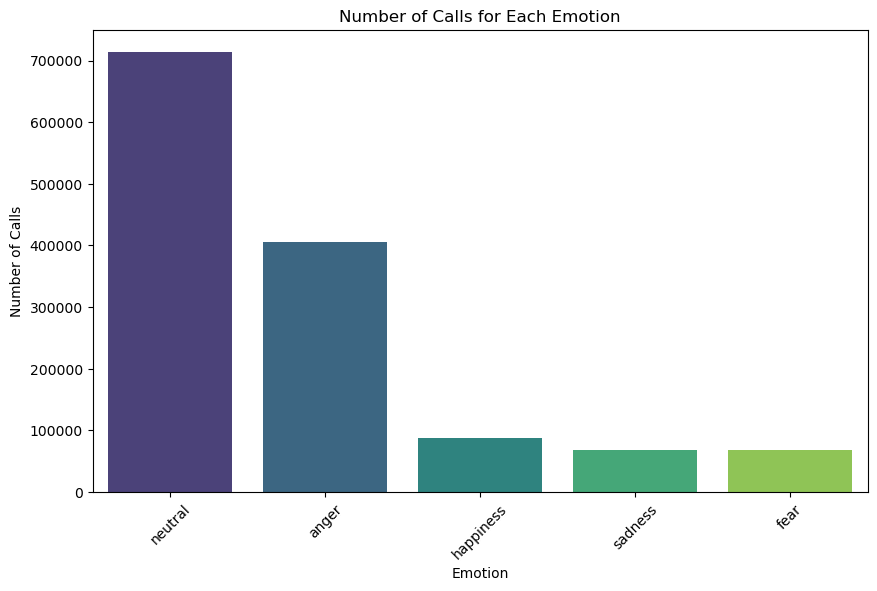

In [8]:
emotion_counts = data['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Calls that were rated

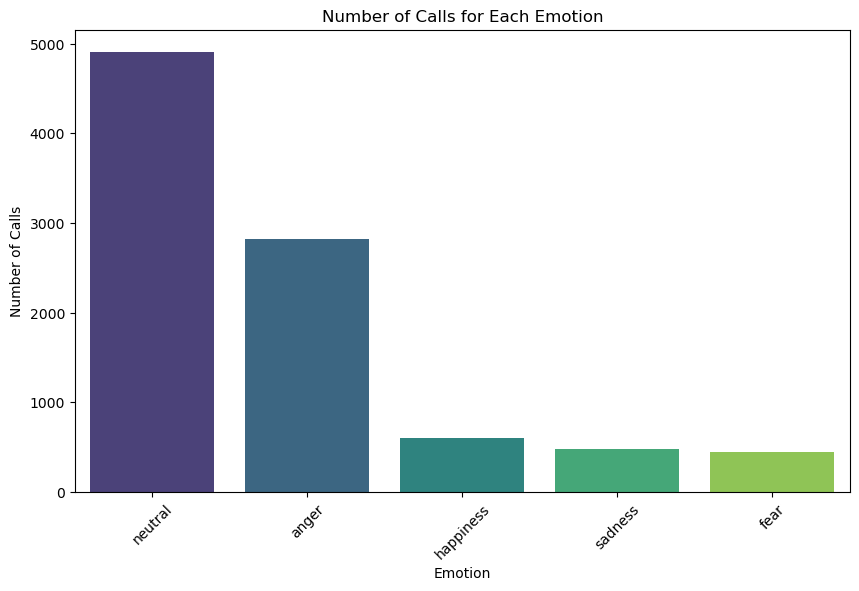

In [9]:
emotion_counts = merged_df['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Including the User Experience

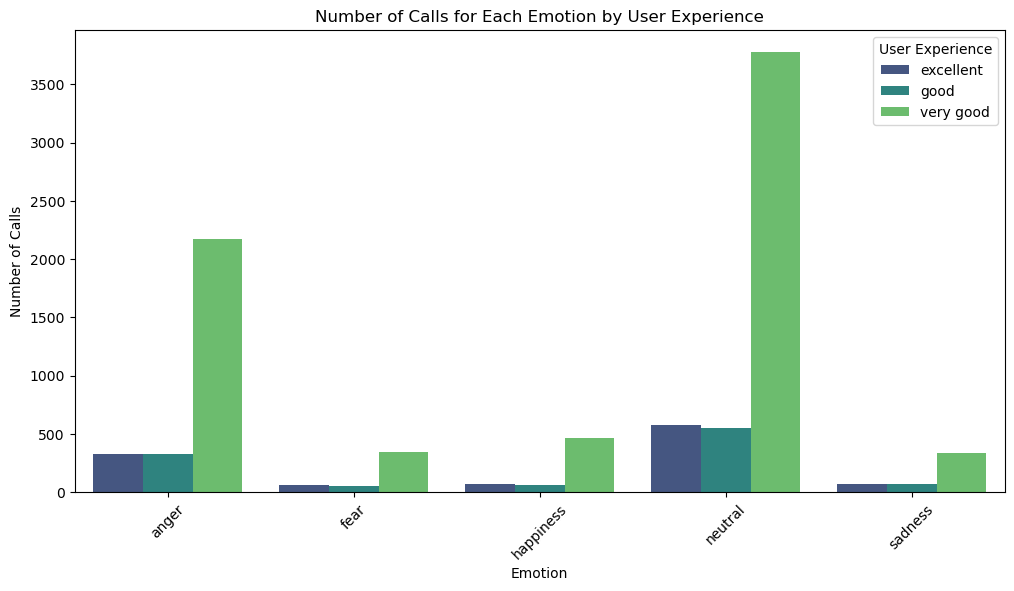

In [10]:
emotion_user_counts =merged_df.groupby(['Emotion', 'User_Experience']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', hue='User_Experience', data=emotion_user_counts, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion by User Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='User Experience')
plt.show()